In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
pd.set_option('display.max_columns', None)

# Importing Data

In [3]:
Train=pd.read_csv("Train.csv")
Train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [4]:
Test=pd.read_csv("Test.csv")
Test

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle
...,...,...,...,...,...,...
229,2018-12-08,3,300.0,ID_QKQ00O16,Malin 1,Needle
230,2018-12-11,3,300.0,ID_172V2IXW,Tadpole,Needle
231,2018-12-22,3,300.0,ID_2ZK5TE39,Circinus,Malin 1
232,2019-05-07,3,300.0,ID_IS54QGW9,Needle,Andromeda


In [5]:
Train_game=pd.read_csv("train_game_statistics.csv")
Train_game.shape

(1571577, 28)

In [6]:
Test_game=pd.read_csv("test_game_statistics.csv")
Test_game.shape

(780234, 24)

In [7]:
d = pd.concat([Train_game,Test_game])
d.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
d.shape

(2351811, 27)

In [83]:
d.isnull().sum()

Game_ID                    0
Player_ID                  0
id                         0
X                          0
Y                          0
Team                       0
Action                780234
Half                      11
Season                     0
Manager                 5602
Opposition_Team            0
Shots                     92
SoT                       92
Goals_scored          780234
Goals_conceded        780234
Accurate passes           92
Inaccurate passes         92
Passes                    92
Start_minutes             10
End_minutes                0
next_player          1571789
next_x               1571789
next_y               1571789
event_id             1571577
next_team            1571786
next_event_id        1571789
xt_value             1571577
dtype: int64

In [84]:
columns_to_fill_with_mean = ['Goals_scored','Goals_conceded']

# Fill specified columns with the mean of each column
for column in columns_to_fill_with_mean:
    mean_value = d[column].mean()
    d[column].fillna(mean_value, inplace=True)

print(d)

            Game_ID        Player_ID      id     X     Y      Team  \
0       ID_ZZKYYPVY  Player_O7HO1NOB     1.0  52.5  34.0  Circinus   
1       ID_ZZKYYPVY  Player_O7HO1NOB     2.0  52.5  34.0  Circinus   
2       ID_ZZKYYPVY  Player_J0V7B0YE     3.0  37.0  32.7  Circinus   
3       ID_ZZKYYPVY  Player_J0V7B0YE     4.0  39.5  33.0  Circinus   
4       ID_ZZKYYPVY  Player_J0V7B0YE     5.0  39.5  33.0  Circinus   
...             ...              ...     ...   ...   ...       ...   
780229  ID_03VRW8WV  Player_Y6ZZ2X44  3661.0  42.1  57.4  Antennae   
780230  ID_03VRW8WV  Player_Y6ZZ2X44  3662.0  42.1  57.4  Antennae   
780231  ID_03VRW8WV  Player_6DVBNW9L  3663.0   7.5  19.6     Comet   
780232  ID_03VRW8WV  Player_6DVBNW9L  3664.0   7.5  19.6     Comet   
780233  ID_03VRW8WV  Player_77KCLG39  3665.0  23.0   0.0     Comet   

                    Action      Half  Season  Manager Opposition_Team  Shots  \
0          Accurate passes  1st half       2  Ryoichi        Backward    0.0   

In [85]:
d.isnull().sum()

Game_ID                    0
Player_ID                  0
id                         0
X                          0
Y                          0
Team                       0
Action                780234
Half                      11
Season                     0
Manager                 5602
Opposition_Team            0
Shots                     92
SoT                       92
Goals_scored               0
Goals_conceded             0
Accurate passes           92
Inaccurate passes         92
Passes                    92
Start_minutes             10
End_minutes                0
next_player          1571789
next_x               1571789
next_y               1571789
event_id             1571577
next_team            1571786
next_event_id        1571789
xt_value             1571577
dtype: int64

In [86]:
test_game2 = d[d['Season'] == 3]
train_game2 = d[d['Season'] != 3]


In [87]:
train_game2
train_game2.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:

# Filling null values with the mean of each column
mean_values = train_game2.mean()
train_game2.fillna(mean_values)

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_11399/1856013001.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = train_game2.mean()


,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571572,ID_00EFNL7L,Player_30LIPYOT,3454.0,15.3,21.3,Milky Way,Air challenges won,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.20,97.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571573,ID_00EFNL7L,Player_3B44A2GJ,3455.0,88.6,48.7,Butterfly,Positional attacks,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571574,ID_00EFNL7L,Player_3B44A2GJ,3456.0,88.6,48.7,Butterfly,Fouls,2nd half,1,Dante,Milky Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.22,97.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571575,ID_00EFNL7L,Player_DICH31J8,3457.0,18.1,19.7,Milky Way,Inaccurate passes,2nd half,1,Masashi,Butterfly,0.0,0.0,0.0,0.0,0.0,1.0,1.0,97.77,98.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Filling null values with the mean of each column
mean_values = test_game2.mean()
test_game2.fillna(mean_values)

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_11399/298629111.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = test_game2.mean()


,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,1.0,0.0,1.0,0.68,1.02,Player_INTSA2WQ,37.500000,30.900000,0.0,Milky Way,1.000000,-0.002220
1,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.68,1.02,Player_5CBBVY85,52.500000,34.000000,0.0,Milky Way,0.000000,0.000000
2,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.70,1.03,Player_INTSA2WQ,37.500000,30.900000,1.0,Milky Way,1.000000,0.000000
3,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,1.0,0.0,1.0,0.70,1.03,Player_1AJ0QRLU,79.000000,57.200000,1.0,Sunflower,2.000000,0.016906
4,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,NaN,1st half,3,Frodo,Milky Way,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.77,1.10,Player_75QJWOU4,79.000000,57.200000,2.0,Milky Way,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780229,ID_03VRW8WV,Player_Y6ZZ2X44,3661.0,42.1,57.4,Antennae,NaN,2nd half,3,Elrick,Comet,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.33,96.67,Player_Y6ZZ2X44,42.100000,57.400000,2041.0,Antennae,2041.000000,0.000000
780230,ID_03VRW8WV,Player_Y6ZZ2X44,3662.0,42.1,57.4,Antennae,NaN,2nd half,3,Elrick,Comet,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.33,96.67,Player_Y6ZZ2X44,42.100000,57.400000,2041.0,Antennae,2041.000000,0.000000
780231,ID_03VRW8WV,Player_6DVBNW9L,3663.0,7.5,19.6,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.42,96.75,Player_6DVBNW9L,7.500000,19.600000,2042.0,Comet,2042.000000,0.000000
780232,ID_03VRW8WV,Player_6DVBNW9L,3664.0,7.5,19.6,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.42,96.75,Player_77KCLG39,23.000000,0.000000,2042.0,Comet,2043.000000,0.000000


In [11]:
#d['next_player','next_action','next_team']=d['next_player','next_action','next_team']

In [12]:
#d[['Action']] = d[['Action']].fillna(method='bfill')

In [13]:
#d = d.drop(['next_action'],axis=1)

In [14]:
#d.isnull().sum()

Game_ID                    0
Player_ID                  0
id                         0
X                          0
Y                          0
Team                       0
Action                780234
Half                      11
Season                     0
Manager                 5602
Opposition_Team            0
Shots                     92
SoT                       92
Goals_scored          780234
Goals_conceded        780234
Accurate passes           92
Inaccurate passes         92
Passes                    92
Start_minutes             10
End_minutes                0
next_player          1571789
next_x               1571789
next_y               1571789
event_id             1571577
next_team            1571786
next_event_id        1571789
xt_value             1571577
dtype: int64

In [90]:
test_game2

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,1.0,0.0,1.0,0.68,1.02,Player_INTSA2WQ,37.5,30.9,0.0,Milky Way,1.0,-0.002220
1,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.68,1.02,Player_5CBBVY85,52.5,34.0,0.0,Milky Way,0.0,0.000000
2,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.70,1.03,Player_INTSA2WQ,37.5,30.9,1.0,Milky Way,1.0,0.000000
3,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,NaN,1st half,3,Masashi,Sunflower,0.0,0.0,0.000568,0.000568,1.0,0.0,1.0,0.70,1.03,Player_1AJ0QRLU,79.0,57.2,1.0,Sunflower,2.0,0.016906
4,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,NaN,1st half,3,Frodo,Milky Way,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.77,1.10,Player_75QJWOU4,79.0,57.2,2.0,Milky Way,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780229,ID_03VRW8WV,Player_Y6ZZ2X44,3661.0,42.1,57.4,Antennae,NaN,2nd half,3,Elrick,Comet,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.33,96.67,Player_Y6ZZ2X44,42.1,57.4,2041.0,Antennae,2041.0,0.000000
780230,ID_03VRW8WV,Player_Y6ZZ2X44,3662.0,42.1,57.4,Antennae,NaN,2nd half,3,Elrick,Comet,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.33,96.67,Player_Y6ZZ2X44,42.1,57.4,2041.0,Antennae,2041.0,0.000000
780231,ID_03VRW8WV,Player_6DVBNW9L,3663.0,7.5,19.6,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.42,96.75,Player_6DVBNW9L,7.5,19.6,2042.0,Comet,2042.0,0.000000
780232,ID_03VRW8WV,Player_6DVBNW9L,3664.0,7.5,19.6,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,96.42,96.75,Player_77KCLG39,23.0,0.0,2042.0,Comet,2043.0,0.000000


# Exploratory Data Analysis 

### Checking the shape of the datasets

In [91]:
Train.shape, Test.shape, Train_game.shape, Test_game.shape

((412, 7), (234, 6), (1571577, 28), (780234, 24))

### Checking Nulls

In [92]:
Train.isnull().sum()

Date         0
Season       0
Match_ID     0
Game_ID      0
Home Team    0
Away Team    0
Score        0
dtype: int64

In [57]:
Test.isnull().sum()

Date         0
Season       0
Match_ID     0
Game_ID      0
Home Team    0
Away Team    0
dtype: int64

In [93]:
Train_game.isnull().sum()

Game_ID                    0
Player_ID                  0
id                         0
X                          0
Y                          0
Team                       0
Action                     0
Half                       0
Season                     0
Manager                    0
Opposition_Team            0
Shots                      0
SoT                        0
Goals_scored               0
Goals_conceded             0
Accurate passes            0
Inaccurate passes          0
Passes                     0
Start_minutes              0
End_minutes                0
next_player          1571577
next_action          1571577
next_x               1571577
next_y               1571577
event_id             1571577
next_team            1571577
next_event_id        1571577
xt_value             1571577
dtype: int64

In [94]:
Test_game.isnull().sum()

Game_ID                 0
Player_ID               0
id                      0
X                       0
Y                       0
Team                    0
Half                   11
Season                  0
Manager              5602
Opposition_Team         0
Shots                  92
SoT                    92
Accurate passes        92
Inaccurate passes      92
Passes                 92
Start_minutes          10
End_minutes             0
next_player           212
next_x                212
next_y                212
event_id                0
next_team             209
next_event_id         212
xt_value                0
dtype: int64

### Checking duplicated rows

In [95]:
Train.duplicated().sum()

0

In [96]:
Test.duplicated().sum()

0

In [97]:
Train_game.duplicated().sum()

3743

In [98]:
Test_game.duplicated().sum()

0

### Merging Tables

In [99]:
merged_train = pd.merge(Train, train_game2, on='Game_ID')
merged_train.head()

,Date,Season_x,Match_ID,Game_ID,Home Team,Away Team,Score,Player_ID,id,X,Y,Team,Action,Half,Season_y,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_MV0TGOYE,1.0,52.5,34.3,Andromeda,Free-kick attacks,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_MV0TGOYE,2.0,52.5,34.3,Andromeda,Accurate passes,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.18,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_P1I1LJ4T,3.0,39.5,34.2,Andromeda,Free-kick attacks,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_P1I1LJ4T,4.0,43.3,34.2,Andromeda,Inaccurate passes,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.23,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_P1I1LJ4T,5.0,43.3,34.2,Andromeda,Free-kick attacks,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
merged_test = pd.merge(Test, test_game2, on='Game_ID')
merged_test.head()

,Date,Season_x,Match_ID,Game_ID,Home Team,Away Team,Player_ID,id,X,Y,Team,Action,Half,Season_y,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_K4YVUM05,1.0,52.0,33.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.03,0.37,Player_K4YVUM05,52.0,33.9,0.0,Cosmos Redshift 7,0.0,0.000000
1,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_K4YVUM05,2.0,52.0,33.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.0,0.0,0.000568,0.000568,1.0,0.0,1.0,0.03,0.37,Player_XH7OO4D7,35.0,31.9,0.0,Cosmos Redshift 7,1.0,-0.003522
2,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_XH7OO4D7,3.0,35.0,31.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.07,0.40,Player_XH7OO4D7,35.0,31.9,1.0,Cosmos Redshift 7,1.0,0.000000
3,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_XH7OO4D7,4.0,35.0,31.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.0,0.0,0.000568,0.000568,1.0,0.0,1.0,0.07,0.40,Player_XY4WUS3P,79.1,62.4,1.0,Antennae,2.0,0.016239
4,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_XY4WUS3P,5.0,25.9,5.6,Antennae,NaN,1st half,3,Elrick,Cosmos Redshift 7,0.0,0.0,0.000568,0.000568,0.0,0.0,0.0,0.12,0.45,Player_1EMBIZVU,79.1,62.4,2.0,Cosmos Redshift 7,3.0,0.000000


In [101]:
merged_train.skew()

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_11399/3922604160.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_train.skew()


Season_x              0.054283
Match_ID              0.019276
id                    0.074862
X                    -0.005308
Y                     0.007510
Season_y              0.054283
Shots                13.397490
SoT                  25.946883
Goals_scored         41.915255
Goals_conceded       41.915255
Accurate passes       1.549341
Inaccurate passes     4.343621
Passes                1.219956
Start_minutes         0.043149
End_minutes           0.043142
next_player                NaN
next_x                     NaN
next_y                     NaN
event_id                   NaN
next_team                  NaN
next_event_id              NaN
xt_value                   NaN
dtype: float64

In [67]:
merged_train.kurtosis()

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_11399/2170605026.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_train.kurtosis()


Season_x               -1.997056
Match_ID               -1.188042
id                     -1.093032
X                      -0.917511
Y                      -1.216155
Season_y               -1.997056
Shots                 177.492957
SoT                   671.241572
Goals_scored         1754.890814
Goals_conceded       1754.890814
Accurate passes         0.400457
Inaccurate passes      16.867064
Passes                 -0.511709
Start_minutes          -1.203164
End_minutes            -1.203148
next_player                  NaN
next_action                  NaN
next_x                       NaN
next_y                       NaN
event_id                     NaN
next_team                    NaN
next_event_id                NaN
xt_value                     NaN
dtype: float64

In [102]:
#Dropping columns
columns_to_drop = ["next_player","next_x","next_y","event_id","next_team","next_event_id","xt_value"]

merged_train.drop(columns=columns_to_drop, inplace=True)

In [103]:
#Dropping columns
columns_to_drop = ["next_player","next_x","next_y","event_id","next_team","next_event_id","xt_value"]

merged_test.drop(columns=columns_to_drop, inplace=True)


In [ ]:
#merged_train = merged_train.drop(['next_action'],axis=1)
#merged_test = merged_test.drop(['next_action'],axis=1)

In [106]:
merged_train.head()

,Date,Season_x,Match_ID,Game_ID,Home Team,Away Team,Score,Player_ID,id,X,Y,Team,Action,Half,Season_y,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_MV0TGOYE,1.0,52.5,34.3,Andromeda,Free-kick attacks,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.52
1,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_MV0TGOYE,2.0,52.5,34.3,Andromeda,Accurate passes,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.18,0.52
2,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_P1I1LJ4T,3.0,39.5,34.2,Andromeda,Free-kick attacks,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.53
3,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_P1I1LJ4T,4.0,43.3,34.2,Andromeda,Inaccurate passes,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.23,0.57
4,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,Player_P1I1LJ4T,5.0,43.3,34.2,Andromeda,Free-kick attacks,1st half,1,Alex,Antennae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,0.57


In [77]:
#mean_values = merged_test.mean()
#merged_test.fillna(mean_values)

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_11399/4106636962.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = merged_test.mean()


,Season_x,Match_ID,Game_ID,Home Team,Away Team,Player_ID,id,X,Y,Team,Action,Half,Season_y,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Month,Day,Year
0,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_K4YVUM05,1.0,52.0,33.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.030000,0.37,12,8,2018
1,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_K4YVUM05,2.0,52.0,33.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,0.030000,0.37,12,8,2018
2,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_XH7OO4D7,3.0,35.0,31.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.070000,0.40,12,8,2018
3,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_XH7OO4D7,4.0,35.0,31.9,Cosmos Redshift 7,NaN,1st half,3,Bodo/Drogo,Antennae,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,0.070000,0.40,12,8,2018
4,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7,Player_XY4WUS3P,5.0,25.9,5.6,Antennae,NaN,1st half,3,Elrick,Cosmos Redshift 7,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.120000,0.45,12,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780229,3,300.0,ID_2ZK5TE39,Circinus,Malin 1,Player_X982WR9W,300.0,300.0,300.0,Malin 1,NaN,NaN,3,NaN,Circinus,0.005117,0.001356,NaN,NaN,0.197852,0.045343,0.243195,47.404252,300.00,12,22,2018
780230,3,300.0,ID_IS54QGW9,Needle,Andromeda,Player_X982WR9W,300.0,300.0,300.0,Needle,NaN,NaN,3,NaN,Andromeda,0.005117,0.001356,NaN,NaN,0.197852,0.045343,0.243195,47.404252,300.00,5,7,2019
780231,3,300.0,ID_IS54QGW9,Needle,Andromeda,Player_X982WR9W,300.0,300.0,300.0,Andromeda,NaN,NaN,3,NaN,Needle,0.005117,0.001356,NaN,NaN,0.197852,0.045343,0.243195,47.404252,300.00,5,7,2019
780232,3,300.0,ID_YG9IONLS,Tadpole,Circinus,Player_X982WR9W,300.0,300.0,300.0,Tadpole,NaN,NaN,3,NaN,Circinus,0.005117,0.001356,NaN,NaN,0.197852,0.045343,0.243195,47.404252,300.00,5,14,2019


In [107]:
columns_to_fill_with_mean = ['Goals_scored','Goals_conceded']

# Fill specified columns with the mean of each column
for column in columns_to_fill_with_mean:
    mean_value = merged_test[column].mean()
    merged_test[column].fillna(mean_value, inplace=True)

print(merged_test)

              Date  Season_x  Match_ID      Game_ID Home Team  \
0       2018-12-08         3     102.0  ID_8518U587  Antennae   
1       2018-12-08         3     102.0  ID_8518U587  Antennae   
2       2018-12-08         3     102.0  ID_8518U587  Antennae   
3       2018-12-08         3     102.0  ID_8518U587  Antennae   
4       2018-12-08         3     102.0  ID_8518U587  Antennae   
...            ...       ...       ...          ...       ...   
780229  2018-12-22         3     300.0  ID_2ZK5TE39  Circinus   
780230  2019-05-07         3     300.0  ID_IS54QGW9    Needle   
780231  2019-05-07         3     300.0  ID_IS54QGW9    Needle   
780232  2019-05-14         3     300.0  ID_YG9IONLS   Tadpole   
780233  2019-05-14         3     300.0  ID_YG9IONLS   Tadpole   

                Away Team        Player_ID     id      X      Y  \
0       Cosmos Redshift 7  Player_K4YVUM05    1.0   52.0   33.9   
1       Cosmos Redshift 7  Player_K4YVUM05    2.0   52.0   33.9   
2       Cosmos Red

In [108]:
merged_test.isnull().sum()

Date                      0
Season_x                  0
Match_ID                  0
Game_ID                   0
Home Team                 0
Away Team                 0
Player_ID                 0
id                        0
X                         0
Y                         0
Team                      0
Action               780234
Half                     11
Season_y                  0
Manager                5602
Opposition_Team           0
Shots                    92
SoT                      92
Goals_scored              0
Goals_conceded            0
Accurate passes          92
Inaccurate passes        92
Passes                   92
Start_minutes            10
End_minutes               0
dtype: int64

In [109]:
#changing date to month
merged_train['Date'] = pd.to_datetime(merged_train['Date'])

# Extract month, day, and year into separate columns
merged_train['Month'] = merged_train['Date'].dt.month
merged_train['Day'] = merged_train['Date'].dt.day
merged_train['Year'] = merged_train['Date'].dt.year

# Optionally, you can drop the original 'Date' column if you don't need it anymore
merged_train.drop('Date', axis=1, inplace=True)



In [110]:
#changing date to month
merged_test['Date'] = pd.to_datetime(merged_test['Date'])

# Extract month, day, and year into separate columns
merged_test['Month'] = merged_test['Date'].dt.month
merged_test['Day'] = merged_test['Date'].dt.day
merged_test['Year'] = merged_test['Date'].dt.year

# Optionally, you can drop the original 'Date' column if you don't need it anymore
merged_test.drop('Date', axis=1, inplace=True)

In [111]:
from sklearn.preprocessing import LabelEncoder

# Selecting only the categorical columns for train dataset
categorical_columns_train = ['Game_ID','Home Team','Away Team','Score','Action','Player_ID','Team','Half','Manager','Opposition_Team']

# Label encode the categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns_train:
    merged_train[col] = label_encoder.fit_transform(merged_train[col])

print(merged_train)


         Season_x  Match_ID  Game_ID  Home Team  Away Team  Score  Player_ID  \
0               1       1.0      218          1          0      0        401   
1               1       1.0      218          1          0      0        401   
2               1       1.0      218          1          0      0        446   
3               1       1.0      218          1          0      0        446   
4               1       1.0      218          1          0      0        446   
...           ...       ...      ...        ...        ...    ...        ...   
1571572         2     105.0      351         14         13      2        408   
1571573         2     105.0      351         14         13      2        408   
1571574         2     105.0      351         14         13      2        408   
1571575         2     105.0      351         14         13      2        289   
1571576         2     105.0      351         14         13      2        289   

             id     X     Y  Team  Acti

In [112]:
# Selecting only the categorical columns for test dataset
categorical_columns = ['Game_ID','Home Team','Away Team','Player_ID','Team','Half','Manager','Opposition_Team']

# Label encode the categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    merged_test[col] = label_encoder.fit_transform(merged_test[col])

print(merged_test)


        Season_x  Match_ID  Game_ID  Home Team  Away Team  Player_ID     id  \
0              3     102.0       51          1          7        306    1.0   
1              3     102.0       51          1          7        306    2.0   
2              3     102.0       51          1          7        493    3.0   
3              3     102.0       51          1          7        493    4.0   
4              3     102.0       51          1          7        499    5.0   
...          ...       ...      ...        ...        ...        ...    ...   
780229         3     300.0       23          5          9        491  300.0   
780230         3     300.0      125         12          0        491  300.0   
780231         3     300.0      125         12          0        491  300.0   
780232         3     300.0      219         14          5        491  300.0   
780233         3     300.0      219         14          5        491  300.0   

            X      Y  Team Action  Half  Season_y  

<Axes: >

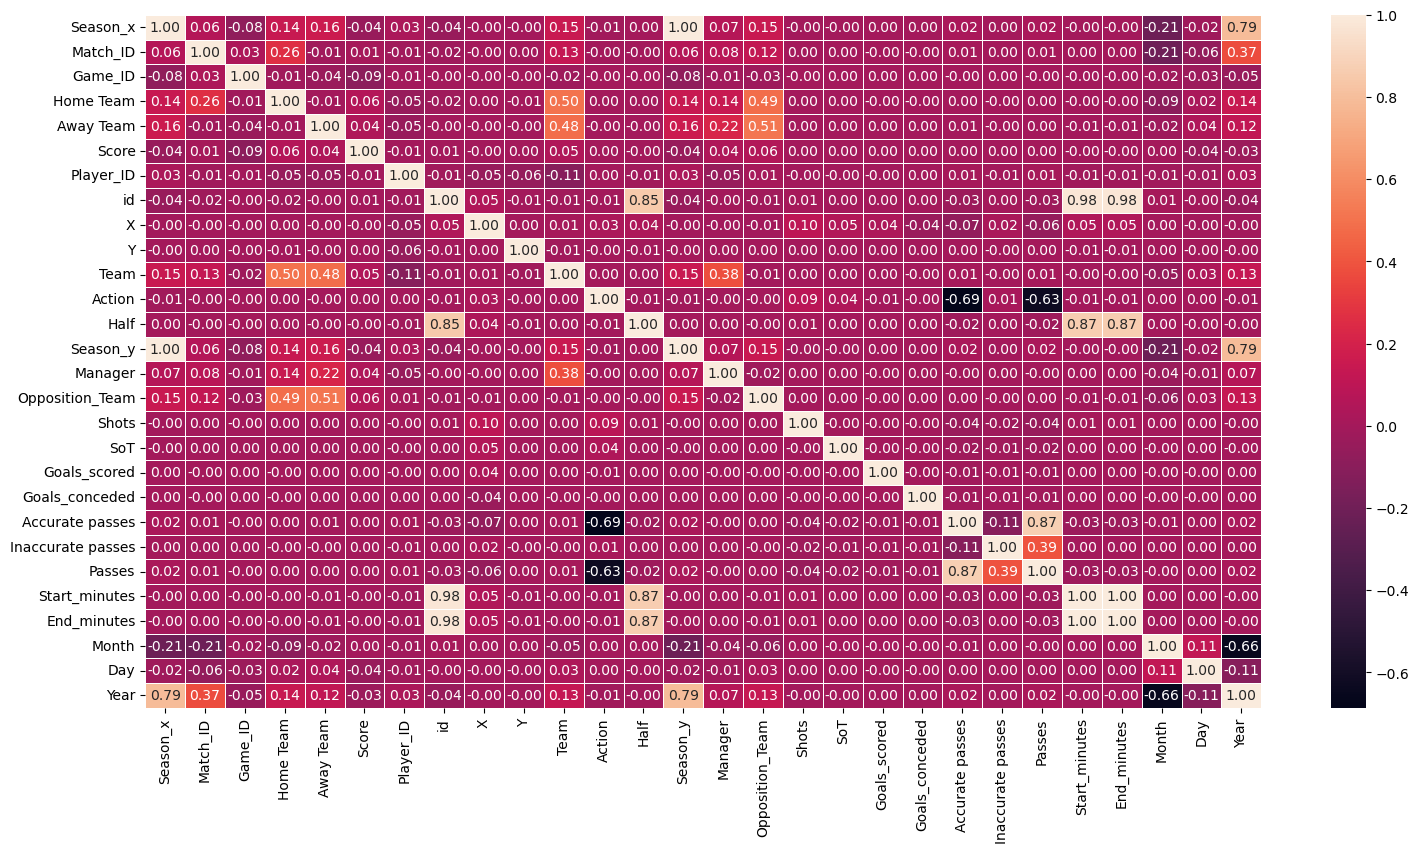

In [113]:
corr_matrix = merged_train.corr()

plt.figure(figsize = (18, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths= 0.5)

# Feature Selection

In [114]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

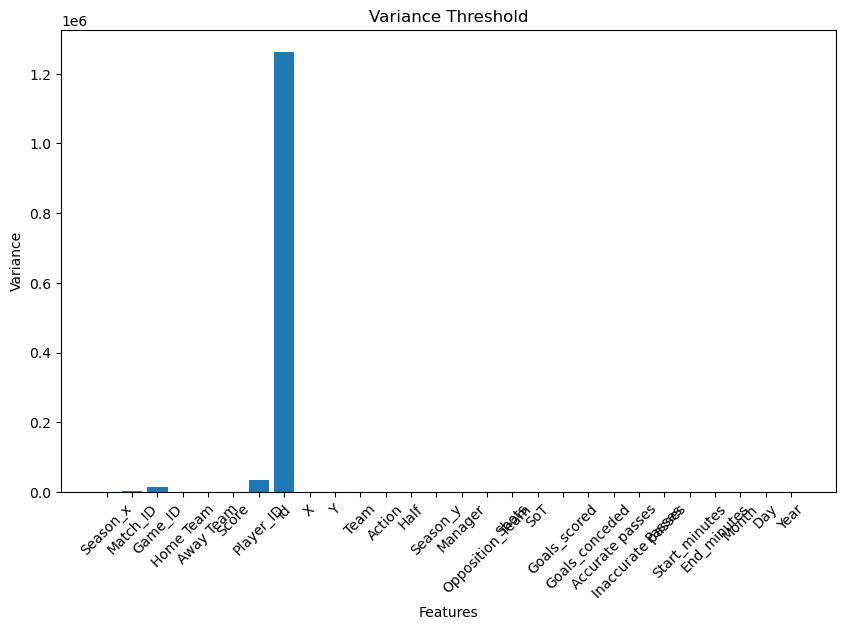

In [115]:

# Set the threshold for variance
threshold = 0.25

# Apply variance threshold to remove low-variance features
variance_selector = VarianceThreshold(threshold=threshold)
df_filtered = variance_selector.fit_transform(merged_train)

# Get the feature variances after filtering
feature_variances = np.var(merged_train, axis=0)

# Plot the variances of the features
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_variances)), feature_variances)
plt.xticks(range(len(feature_variances)), merged_train.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance Threshold')
plt.show()


In [117]:
merged_train = merged_train.drop(['Match_ID','Passes','Half','Opposition_Team','id','Player_ID','Season_y','Season_x','Manager','Start_minutes','End_minutes'],axis=1)
merged_test = merged_test.drop(['Match_ID','Passes','Half','Opposition_Team','id','Player_ID','Season_y','Season_x','Manager','Start_minutes','End_minutes'],axis=1)

In [ ]:
merged_train = merged_train.drop(['X','Y','Action','Team','Shots','Month','Day','Year'],axis=1)
merged_test = merged_test.drop(['Game_ID','X','Y','Team','Shots','Month','Day','Year'],axis=1)

In [42]:
#merged_train = merged_train.drop(['Team'],axis=1)

In [120]:
merged_train.head()

,Game_ID,Home Team,Away Team,Score,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes
0,218,1,0,0,0.0,0.0,0.0,0.0,0.0
1,218,1,0,0,0.0,0.0,0.0,1.0,0.0
2,218,1,0,0,0.0,0.0,0.0,0.0,0.0
3,218,1,0,0,0.0,0.0,0.0,0.0,1.0
4,218,1,0,0,0.0,0.0,0.0,0.0,0.0


In [122]:
merged_test = merged_test.drop(['Action'],axis=1)

In [123]:
merged_test.head()

,Home Team,Away Team,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes
0,1,7,0.0,0.000568,0.000568,0.0,0.0
1,1,7,0.0,0.000568,0.000568,1.0,0.0
2,1,7,0.0,0.000568,0.000568,0.0,0.0
3,1,7,0.0,0.000568,0.000568,1.0,0.0
4,1,7,0.0,0.000568,0.000568,0.0,0.0


# Modelling

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [125]:
X = merged_train.drop(["Score","Game_ID"], axis=1)
y = merged_train["Score"]

In [126]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1571572    2
1571573    2
1571574    2
1571575    2
1571576    2
Name: Score, Length: 1571577, dtype: int64

In [127]:
X

,Home Team,Away Team,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes
0,1,0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0
3,1,0,0.0,0.0,0.0,0.0,1.0
4,1,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1571572,14,13,0.0,0.0,0.0,0.0,0.0
1571573,14,13,0.0,0.0,0.0,0.0,0.0
1571574,14,13,0.0,0.0,0.0,0.0,1.0
1571575,14,13,0.0,0.0,0.0,0.0,0.0


In [128]:
X_test=merged_test
X_test.head()

,Home Team,Away Team,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes
0,1,7,0.0,0.000568,0.000568,0.0,0.0
1,1,7,0.0,0.000568,0.000568,1.0,0.0
2,1,7,0.0,0.000568,0.000568,0.0,0.0
3,1,7,0.0,0.000568,0.000568,1.0,0.0
4,1,7,0.0,0.000568,0.000568,0.0,0.0


In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)


X_test_scaled = scaler.transform(X_test)


### RandomForestClassifier

In [130]:
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

### DecisionTreeClassifier

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()  
dt.fit(X, y) 

DecisionTreeClassifier()

### KNeighborsClassifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X, y)

KNeighborsClassifier()

### LogisticRegression

In [133]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression classifier
lr = LogisticRegression()

# Train the classifier on the training data
lr.fit(X, y)

/Users/da_m1_19/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()